### Import Dependencies

In [8]:
# pip install tensorflow<2.11
# pip install numpy

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# check for GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Downloading the flower dataset

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')

228813984/228813984 [==============================] - 63s 0us/step


### Checking the total number of images (3670 images)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


### Parameters for the folder

In [32]:
batch_size = 16
img_height = 256
img_width = 256

### Splitting the dataset into train and validation sets

In [33]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


### All the classes in the minst dataset

In [34]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### Visualize the data

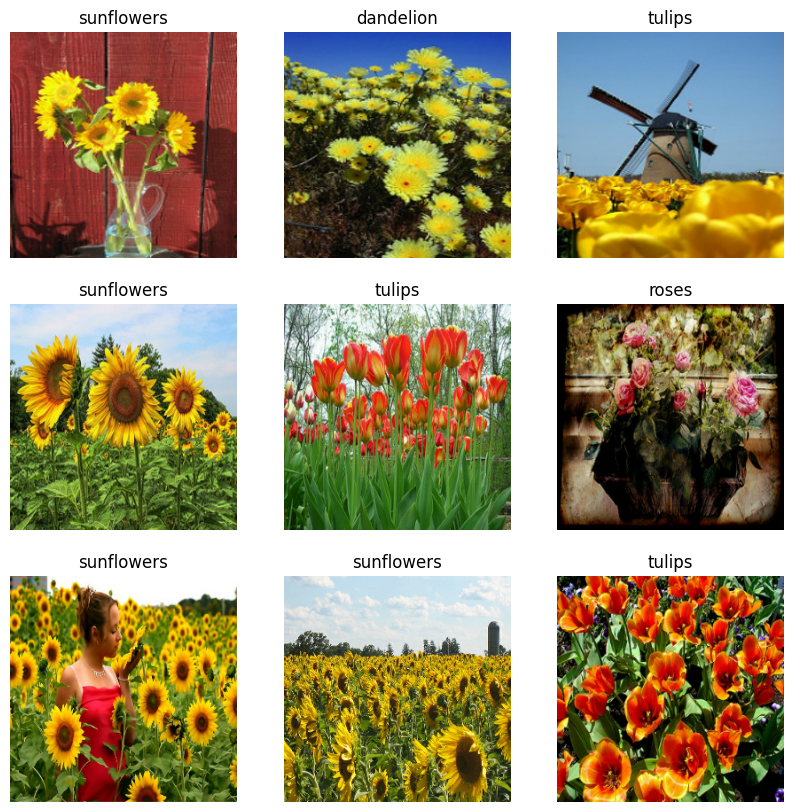

In [35]:
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Compiling the model

In [40]:
resnet_model = tf.keras.Sequential()
resnet = tf.keras.applications.resnet50.ResNet50(include_top=False, input_shape=(256, 256, 3))
resnet_model.add(resnet)
num_classes = 5 

resnet_model.add(tf.keras.layers.Flatten())

# 128 neurons because our input data is not a lot
resnet_model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
resnet_model.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))

resnet_model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training the model

In [41]:
EPOCH = 3
resnet_model.fit(train_ds, epochs=EPOCH) 

Epoch 1/3


184/184 [==============================] - 513s 3s/step - loss: 0.7387 - accuracy: 0.8007
Epoch 2/3
184/184 [==============================] - 568s 3s/step - loss: 0.1206 - accuracy: 0.9619
Epoch 3/3
184/184 [==============================] - 99s 537ms/step - loss: 0.0555 - accuracy: 0.9850


### Evaluating the Model

In [42]:
# some code of evaluating the model here
test_loss, test_acc = resnet_model.evaluate(val_ds)

print('Test accuracy:', test_acc)

46/46 [==============================] - 5s 66ms/step - loss: 0.4997 - accuracy: 0.8774
Test accuracy: 0.8773841857910156
